# Project - Ford Go Bike Data Exploration
## by (Mohamed Abdullah)

## Preliminary Wrangling


**Dataset**
> <a id='intro'></a>
## Introduction

> Ford GoBike (also known as Bay Wheels system) is a regional public bicycle sharing system in California's San Francisco Bay Area and was introduced in 2013 as a pilot program for the region, with 700 bikes and 70 stations across San Francisco and San Jose.
> The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.
> Ford GoBike consists of a fleet of specially designed, environment-friendly and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips.
> This document explores the Ford GoBike's trip data for public containing bike rides from February 2019.
> The attributes included the trip start/end time, as well as additional measurements such as user type, gender, and age.


In [136]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [137]:
# read the csv file, and check its top 10 rows
data_frame = pd.read_csv("201902-fordgobike-tripdata.csv")
print(data_frame.shape)
data_frame.head(15)

(183412, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [138]:
# check info of data_frame
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [139]:
# check descriptive statistics of data_frame
data_frame.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [140]:
# check null values of data_frame
data_frame.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [141]:
# check null values of data_frame
data_frame.duplicated().sum()


0

### What is the structure of your dataset?
 
> This Dataset holds information about 183.412 bike trips, including its duration, timing, geolocation of the start and end of each trip and information about the rider.
every record represnts a trip
including :
 (( Trip - Duration (seconds) - Start Time and Date - End Time and Date - Start Station ( ID - Name - latitude - longitude ) - End Station ( ID - Name - latitude - longitude ) - Bike ID - User Type (Subscriber or Customer) ))

### What is/are the main feature(s) of interest in your dataset?

> I am interested to know and discover the dependence of the flight duration on age, start and end station, gender and type of user.



### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think that the duration of the trip has a great impact on the start and end station, and crowded places should be provided with more trips than trips. Also, the type of user, age and gender will affect the duration of the trip.

## Data Wrangling

some cleaning steps should be takes :

1. Delete null values where *start_station_id* 
2. Delete *bike_share_for_all_trip* column 
3. Convert *start_time* & *end_time* to datetime
4. Extract weekday and hour of day information from *start_time*
5. Drop all rows where *member_birth_year* is null
6. Make a new coloumn age which is calculated from *member_birth_year* coloumn
7. Create a new column "duration_min" which is the duration of the trips in minutes

In [142]:
# make copy of data_frame before cleaning
df_clean = data_frame.copy()

#### 1. Delete null values where *start_station_id

In [143]:
data_frame.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [144]:
df_clean[df_clean['start_station_id'].isna()]
df_clean.dropna(subset=['start_station_id'], inplace=True)

# check for null values
df_clean.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id              0
start_station_name            0
start_station_latitude        0
start_station_longitude       0
end_station_id                0
end_station_name              0
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8263
member_gender              8263
bike_share_for_all_trip       0
dtype: int64

#### 2. Delete *bike_share_for_all_trip* column 

In [145]:
# delete bike_share_for_all_trip column
df_clean.drop(columns='bike_share_for_all_trip', inplace=True, axis=1)

# show head of data frame
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male


#### 3. Convert *start_time* & *end_time* to datetime

In [146]:
# convert start_time & end_time to datetime
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])

# check info of df
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183215 entries, 0 to 183411
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183215 non-null  int64         
 1   start_time               183215 non-null  datetime64[ns]
 2   end_time                 183215 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183215 non-null  float64       
 6   start_station_longitude  183215 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183215 non-null  float64       
 10  end_station_longitude    183215 non-null  float64       
 11  bike_id                  183215 non-null  int64         
 12  user_type       

#### 4. Extract weekday & hour of day information from *start_time*

In [147]:
# extract dayofweek & hours information from start_time
df_clean['start_time_day'] = df_clean['start_time'].dt.strftime('%a')
df_clean['start_time_hour'] = df_clean.start_time.dt.strftime('%H')

# sort start_time_hourofday ascending
df_clean = df_clean.sort_values(by='start_time_hour',ascending=True)

# show head of df
df_clean.head()
print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183215 entries, 183411 to 122186
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183215 non-null  int64         
 1   start_time               183215 non-null  datetime64[ns]
 2   end_time                 183215 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183215 non-null  float64       
 6   start_station_longitude  183215 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183215 non-null  float64       
 10  end_station_longitude    183215 non-null  float64       
 11  bike_id                  183215 non-null  int64         
 12  user_type  

#### 5. Drop all rows where *member_birth_year* is null

In [148]:
# drop all rows where member_birth_year is null
df_clean[df_clean['member_birth_year'].isna()]
df_clean.dropna(subset=['member_birth_year'], inplace=True)

# check for null values
df_clean.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
start_time_day             0
start_time_hour            0
dtype: int64

#### 6. Calculate age of the members from *member_birth_year*

In [149]:
print(df_clean['start_time'].min())
print(df_clean['start_time'].max())

2019-02-01 00:00:20.636000
2019-02-28 23:59:18.548000


we will just subtract birth year of the members from 2019 when the data was collected (or the trips were made), Because our data is taken in february 2019.

In [150]:
# calculate age of the members from member_birth_year
df_clean['age'] = 2019 - df_clean['member_birth_year']

# check head of df
df_clean.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,start_time_day,start_time_hour,age
183411,271,2019-02-01 00:00:20.636,2019-02-01 00:04:52.058,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989.0,Male,Fri,00,30.0
125891,676,2019-02-11 00:07:58.026,2019-02-11 00:19:14.882,339.0,Jackson St at 11th St,37.800002,-122.266438,46.0,San Antonio Park,37.790140,-122.242373,4989,Subscriber,1982.0,Male,Mon,00,37.0
125890,944,2019-02-11 00:05:12.592,2019-02-11 00:20:57.010,321.0,5th St at Folsom,37.780146,-122.403071,134.0,Valencia St at 24th St,37.752428,-122.420628,5045,Subscriber,1988.0,Male,Mon,00,31.0
125889,418,2019-02-11 00:14:44.694,2019-02-11 00:21:42.945,249.0,Russell St at College Ave,37.858473,-122.253253,274.0,Oregon St at Adeline St,37.857567,-122.267558,5076,Customer,2000.0,Other,Mon,00,19.0
125888,1095,2019-02-11 00:07:41.756,2019-02-11 00:25:57.130,259.0,Addison St at Fourth St,37.866249,-122.299371,273.0,Fulton St at Ashby Ave,37.855574,-122.263565,5119,Subscriber,1994.0,Female,Mon,00,25.0


In [151]:
# convert member_age & member_birth_year to int
df_clean['age'] = df_clean['age'].astype(int)
df_clean['member_birth_year'] = df_clean['member_birth_year'].astype(int)

# check info of df
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 183411 to 122186
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type  

#### 7. Convert *user_type* & *member_gender* to category

In [152]:
# convert user_type & member_gender to category
df_clean['user_type'] = df_clean['user_type'].astype('category')
df_clean['member_gender'] = df_clean['member_gender'].astype('category')

# check info of df
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 183411 to 122186
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type  

#### 7. Convert *duration_sec* to minutes

In [153]:
# convert duration_sec to minutes
df_clean['duration_min'] = df_clean['duration_sec'] / 60

# convert duration_min to float
df_clean['duration_min'] = df_clean['duration_min'].astype(int)

# show head of df
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,start_time_day,start_time_hour,age,duration_min
183411,271,2019-02-01 00:00:20.636,2019-02-01 00:04:52.058,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989,Male,Fri,00,30,4
125891,676,2019-02-11 00:07:58.026,2019-02-11 00:19:14.882,339.0,Jackson St at 11th St,37.800002,-122.266438,46.0,San Antonio Park,37.790140,-122.242373,4989,Subscriber,1982,Male,Mon,00,37,11
125890,944,2019-02-11 00:05:12.592,2019-02-11 00:20:57.010,321.0,5th St at Folsom,37.780146,-122.403071,134.0,Valencia St at 24th St,37.752428,-122.420628,5045,Subscriber,1988,Male,Mon,00,31,15
125889,418,2019-02-11 00:14:44.694,2019-02-11 00:21:42.945,249.0,Russell St at College Ave,37.858473,-122.253253,274.0,Oregon St at Adeline St,37.857567,-122.267558,5076,Customer,2000,Other,Mon,00,19,6
125888,1095,2019-02-11 00:07:41.756,2019-02-11 00:25:57.130,259.0,Addison St at Fourth St,37.866249,-122.299371,273.0,Fulton St at Ashby Ave,37.855574,-122.263565,5119,Subscriber,1994,Female,Mon,00,25,18


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

### Exploring the duration in minutes to understand its distribution

In [154]:
print(df_clean['duration_min'].value_counts())

5       15073
4       14675
6       14357
7       13578
8       12433
        ...  
1090        1
194         1
449         1
321         1
826         1
Name: duration_min, Length: 426, dtype: int64


In [155]:
df_clean['duration_min'].quantile(q=.995)

83.24499999999534

There are outliers in the data in the duration column so, we'are going to remove the rows with the outliers to present the data in a better way.

In [156]:
df_clean = df_clean[(df_clean['duration_min']<83)]

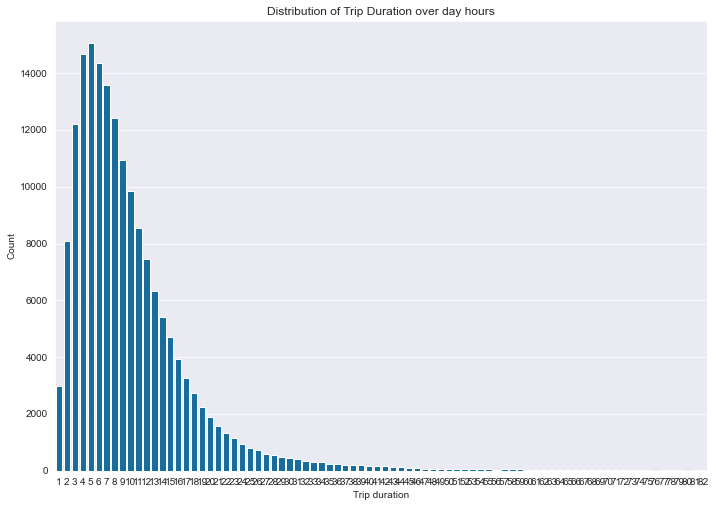

In [157]:
sb.set_style('darkgrid')
plt.figure(figsize=[ 11.69, 8.27])
plt.title('Distribution of Trip Duration over day hours');
sb.countplot(data=df_clean, x='duration_min', color = sb.color_palette('colorblind')[0]);
plt.xlabel('Trip duration');
plt.ylabel('Count');

In [158]:
df_clean = df_clean[(df_clean['duration_min']<40)]

In [159]:
plt.title?

Signature: plt.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)
Docstring:
Set a title for the axes.

Set one of the three available axes titles. The available titles
are positioned above the axes in the center, flush with the left
edge, and flush with the right edge.

Parameters
----------
label : str
    Text to use for the title

fontdict : dict
    A dictionary controlling the appearance of the title text,
    the default *fontdict* is::

       {'fontsize': rcParams['axes.titlesize'],
        'fontweight': rcParams['axes.titleweight'],
        'color': rcParams['axes.titlecolor'],
        'verticalalignment': 'baseline',
        'horizontalalignment': loc}

loc : {'center', 'left', 'right'}, default: :rc:`axes.titlelocation`
    Which title to set.

y : float, default: :rc:`axes.titley`
    Vertical axes loation for the title (1.0 is the top).  If
    None (the default), y is determined automatically to avoid
    decorators on the axes.

pad : float, default: :

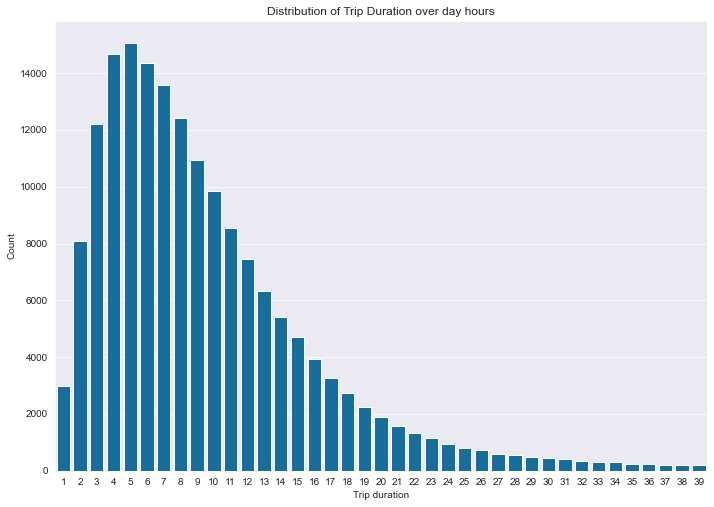

In [160]:
sb.set_style('darkgrid')
plt.figure(figsize=[ 11.69, 8.27])
plt.title('Distribution of Trip Duration over day hours');
sb.countplot(data=df_clean, x='duration_min', color = sb.color_palette('colorblind')[0]);
plt.xlabel('Trip duration');
plt.ylabel('Count');

### Note: It seems that most of the trips duration are between 2 to 11 minutes 

### Customer vs. Subscriber distribution

In [161]:
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%d' % int(height),
                ha='center', va='bottom')

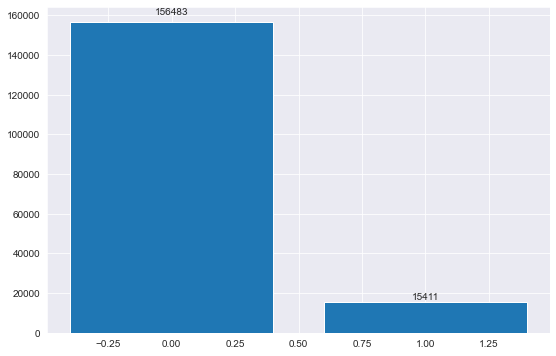

In [162]:
# countplot user_type
values_on_bars = df_clean['user_type'].value_counts()
labels = np.array(values_on_bars.index)
ind = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(9,6))
rects = ax.bar(ind, np.array(values_on_bars));
autolabel(rects)


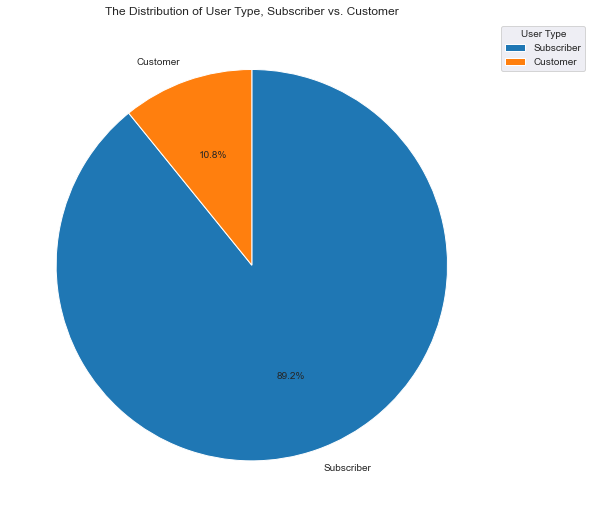

In [163]:
# Plot the distribution of user type
user_type_counts = data_frame['user_type'].value_counts()
plt.figure(figsize=[ 12, 9]);
plt.title('The Distribution of User Type, Subscriber vs. Customer');
plt.pie(user_type_counts, labels = user_type_counts.index, startangle = 90, counterclock = False, autopct='%1.1f%%');
plt.legend(title ="User Type",loc ="upper left",bbox_to_anchor =(1, 0, 0.5, 1));

### Note: It seems that the number of subscriber's is ten times the number of customers

### Most busy times of trips in terms of days and hours

<AxesSubplot:xlabel='start_time_day', ylabel='count'>

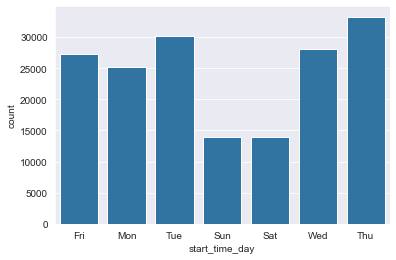

In [164]:
# countplot start_time_dayofweek
sb.countplot(data = df_clean, x='start_time_day', color=sb.color_palette()[0])

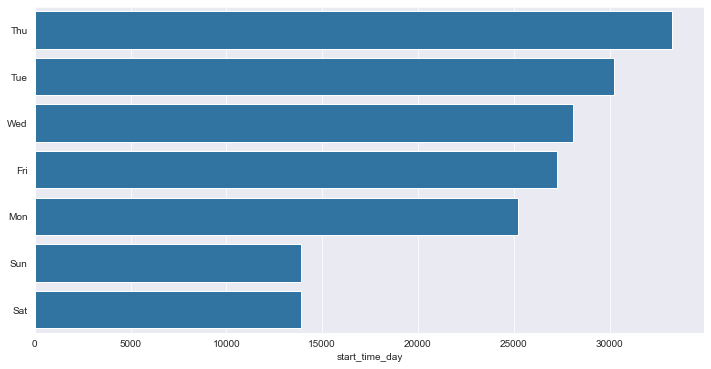

In [165]:
plt.figure(figsize=(12,6))
data = df_clean['start_time_day'].value_counts()
sb.barplot(y = data.index, x = data, color=sb.color_palette()[0])
plt.show()

### Both of the two plots tells the same thing but, the second one is more descriptive. 
### Note: most busy day is Thursday 

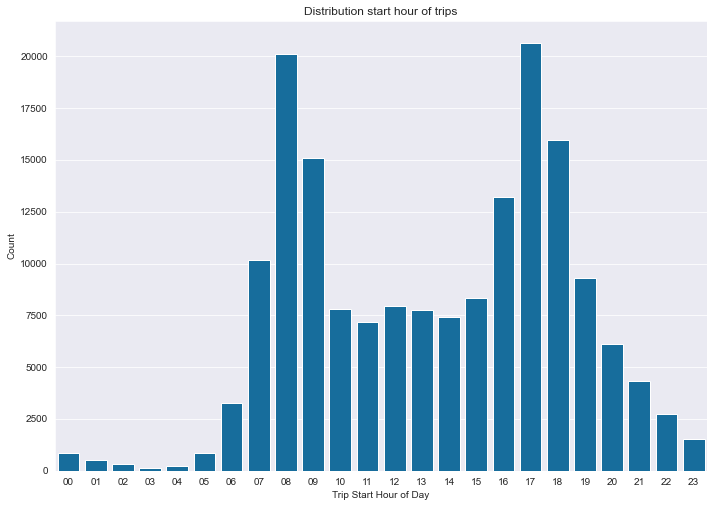

In [166]:
sb.set_style('darkgrid')
plt.figure(figsize=[ 11.69, 8.27])
plt.title('Distribution start hour of trips');
sb.countplot(data=df_clean, x='start_time_hour', color = sb.color_palette('colorblind')[0]);
plt.xlabel('Trip Start Hour of Day');
plt.ylabel('Count');


#### Observations

> - Most bike rides starts on 8:00 AM and on 5:00 PM.

#### 'member_gender' distribution

In [167]:
data_frame['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [168]:
data_frame.member_gender.value_counts(normalize=True)

Male      0.745951
Female    0.233198
Other     0.020851
Name: member_gender, dtype: float64

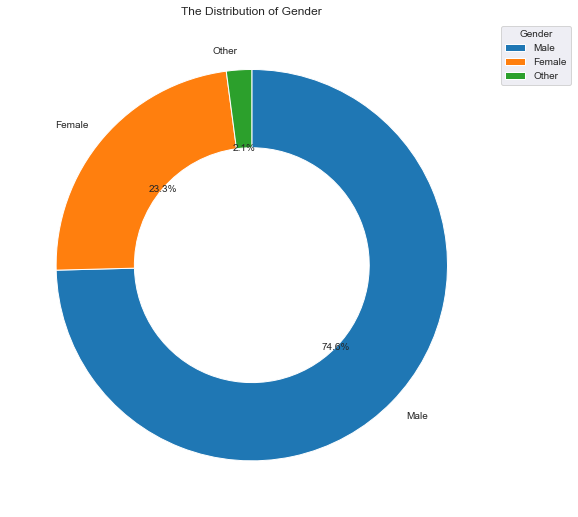

In [169]:
# Use matplotlib.pyplot.pie() function to plot a pie chart
member_gender_counts = data_frame['member_gender'].value_counts()
plt.figure(figsize=[ 12, 9]);
plt.title('The Distribution of Gender');
plt.pie(member_gender_counts, labels = member_gender_counts.index, startangle = 90, counterclock = False, autopct='%1.1f%%', wedgeprops = {'width' : 0.4});
plt.legend(title ="Gender",loc ="upper left",bbox_to_anchor =(1, 0, 0.5, 1));

**Observation**

- The male bikers are about three times in number of female bikers.
- The value counts of "Male", "Female", and "Other" are 126311, 40098, and 3583 respectively.
- However, the percentage of "Male" is approximately 74%, "Female" is approximately 24%, and "Other" is approximately 2% off the "Gender" feature. 

### Distribution of Member Age 

In [170]:
# check descriptive statistics for member_age
df_clean['age'].describe()

count    171894.000000
mean         34.182682
std          10.094796
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: age, dtype: float64

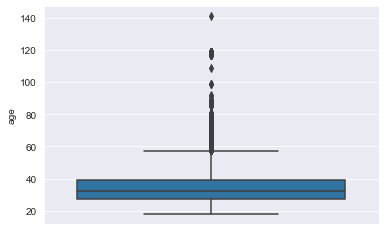

In [171]:
# boxplot member_age
sb.boxplot(data = df_clean, y = 'age');

#### Observations

> - There are some outliers here too, or there are people above 140 which is not likely.

In [172]:
print(df_clean['age'].quantile(q=.99))
print(df_clean[(df_clean['age']>64)].shape[0])

64.0
1647


#### We will exclude all rows where age > 64 which equals about 1% of the data

In [173]:
df_clean = df_clean[df_clean['age'] <= 64]

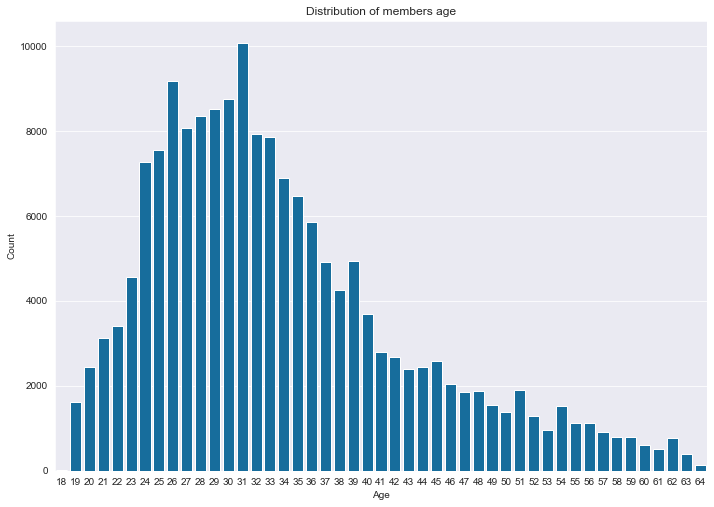

In [174]:
sb.set_style('darkgrid')
plt.figure(figsize=[ 11.69, 8.27])
plt.title('Distribution of members age');
sb.countplot(data=df_clean, x='age', color = sb.color_palette('colorblind')[0]);
plt.xlabel('Age');
plt.ylabel('Count');


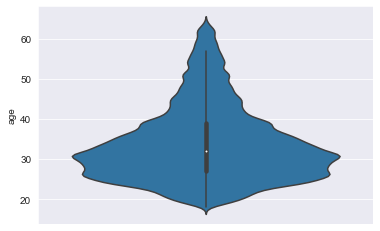

In [175]:
# violinplot member_age
sb.violinplot(data = df_clean, y = 'age');

#### Observations
> - The age distribution chart is left skewed which means that the most bikers are young, and i think it's an obvious note.
> - Most of the bikers age is between 24 and 37 
> - There are not that many bikers above age 40

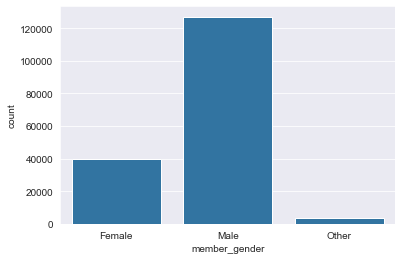

In [176]:
# countplot member_gender
sb.countplot(data = df_clean, x = 'member_gender', color=sb.color_palette()[0]);

#### Observations

> - Most of the bikers are male, approximately three times as much as women.

### Most common start station and endstation Exploration.

In [177]:
most_common_start_station = df_clean['start_station_name'].value_counts()[0:10]

In [178]:
most_common_end_station = df_clean['end_station_name'].value_counts()[0:10]

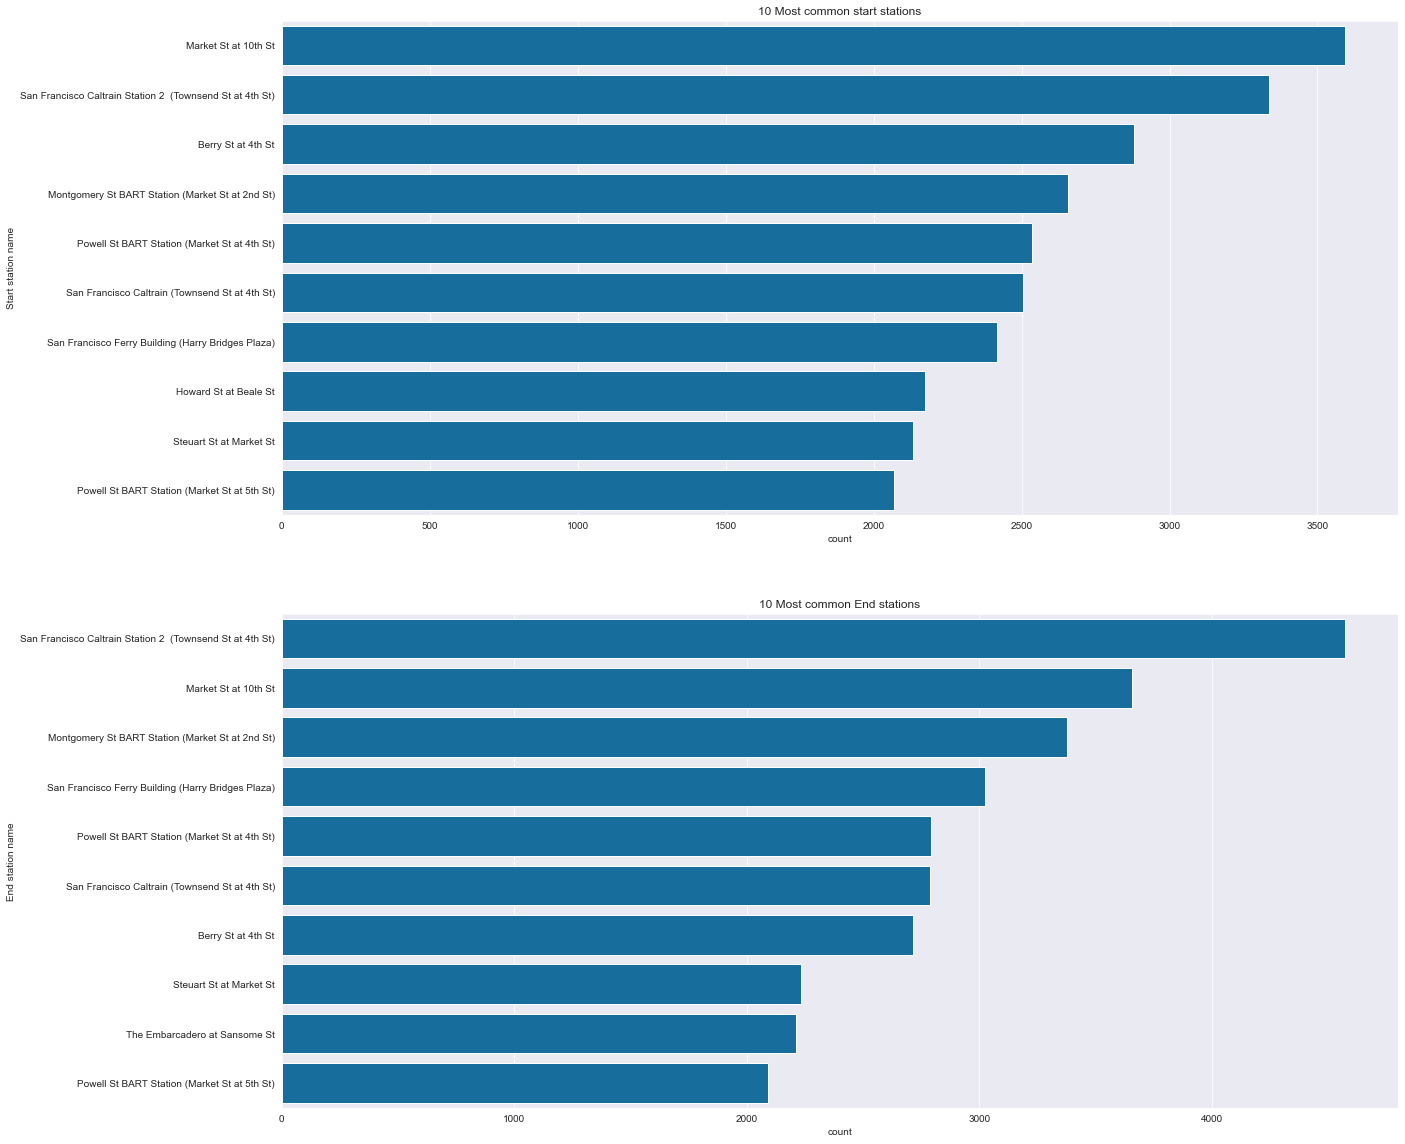

In [179]:
plt.figure(figsize=(20,20))
plt.subplot(2, 1, 1)
data = most_common_start_station
sb.barplot(y = data.index, x = data, orient='h', color = sb.color_palette('colorblind')[0] )
plt.title('10 Most common start stations');
plt.xlabel("count")
plt.ylabel("Start station name")
plt.subplot(2, 1, 2)
data = most_common_end_station
sb.barplot(y = data.index, x = data, orient='h', color = sb.color_palette('colorblind')[0] )
plt.title('10 Most common End stations');
plt.xlabel("count")
plt.ylabel("End station name");

**Observation**

- These stations represent the the most busy or frequently used stations everyday
- We also notice that the 10 most common start station are the same as most end station but differ in frequency which is logical

## Conclusion of the univariate analysis

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> removing extreme values in the duration column which reached 1409 minutes  so I removed  data which are values greater than 83.
> removing extreme values in the age column which reached 143 years old, it`s not logical, so I needed to remove the outliers, the ages greater than 65 years old.
> The plotting of distribution of age reveals that it more concentrated between 21 to 38 years old. 
> The two rush hours with the most trips. The time 8:00 am and 5:00 pm are the two rush hours with the most trips.
> The distribution of both the most common start and end stations is the same which gives the conclusion that people rely on bicycles to go to and from the same places.
> male bikers are about three times of female bikers and the number of male is 126,311 with percentage of  74%, the number of female is 40,098 with percentage of 24%, and the number of other is 3583 with percentage of 2%. 
> Biker subscribers and customers account for approximately 90% and 10%, respectively. However, the number of subscribers is 153,736 and the number of customers is 16,256.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> When checking the year of birth variables, the year of birth is converted by replacing the year in which they were born with the year in which they made these journeys which is 2019 to give the distribution for age.
> With outliers in the age column of 143 years, which I removed represent 1 percent of the data.

> Therefore, it is good to work on drawing the starting station and the end station in a larger diagram so that it gives a better view regarding the bicycle traffic at certain stations.

## Bivariate Exploration


> look at the pairwise correlation of numeric variables

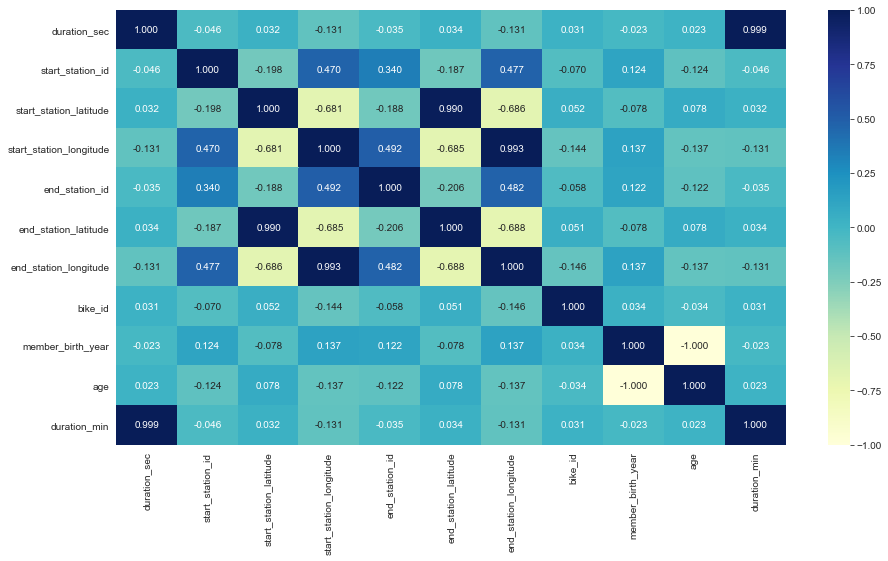

In [182]:
# correlation plot
numeric_vars = ['duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_latitude',
'end_station_longitude', 'bike_id', 'member_birth_year', 'age', 'duration_min']
plt.figure(figsize = [15, 8])
sb.heatmap(df_clean[numeric_vars].corr(), annot = True, fmt = '.3f', cmap = 'YlGnBu', center = 0)
plt.show()

#### Observations

> - There are many pairs of variables that indicate a strong correlation. 

#### Therefore, I will focus on member_age, member_gender, user_type, duration_min, start_time_dayofweek and start_time_hourofday.

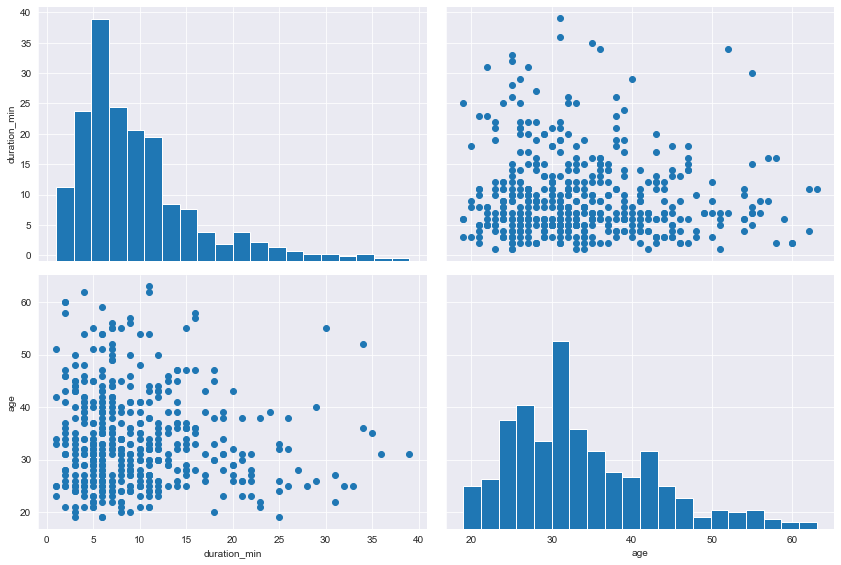

In [183]:
# plot matrix for duration_min & member_age with sample 500 records
np.random.seed(2018)
samples = np.random.choice(df_clean.shape[0], 500, replace = False)
df_clean_samp = df_clean.reindex(samples)

g = sb.PairGrid(data = df_clean_samp, vars = ['duration_min', 'age'], height = 4, aspect = 1.5)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

#### Observations

> - For 25-40 year olds most rounds take 1-20 The plot shows a dense area in the lower left.

### Correlation Member Age and Time Duration

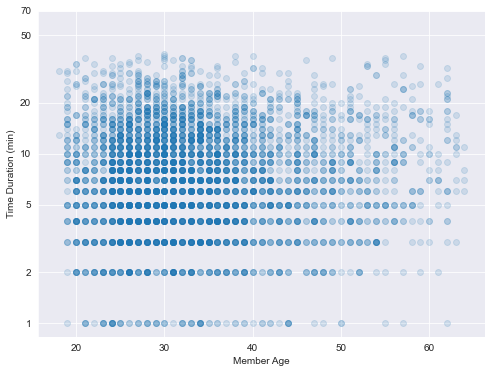

In [184]:
# scatter plot of duration_min vs. member_age, with log transform on duration_min axis
np.random.seed(1997)
samples = np.random.choice(df_clean.shape[0], 5000, replace = False)
df_clean_samp = df_clean.reindex(samples)

plt.figure(figsize = [8, 6]);
plt.scatter(data = df_clean_samp, x = 'age', y = 'duration_min', alpha = 1.5/10);
plt.xlabel('Member Age');
plt.yscale('log');
plt.yticks([1, 2, 5, 10, 20, 50, 70], [1, 2, 5, 10, 20, 50, 70]);
plt.ylabel('Time Duration (min)');

#### Observations

> - The scatter plot shows a strong dense area for Member Age (25-35) and Time Duration (5-15 min).

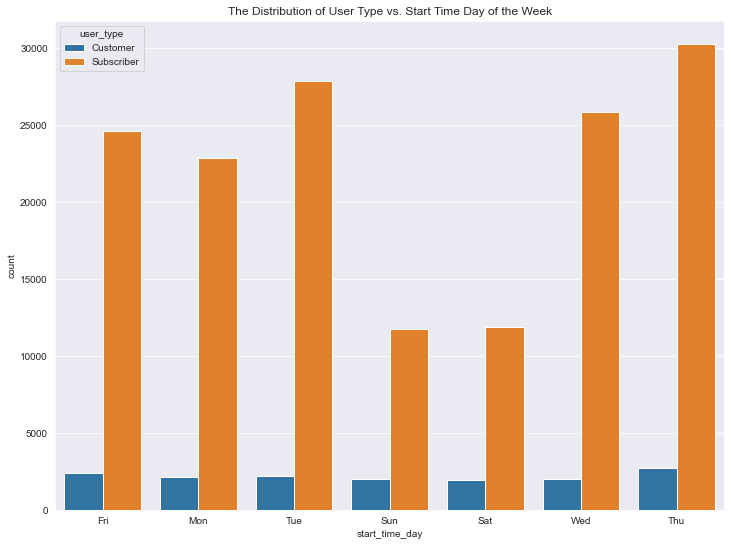

In [185]:
plt.figure(figsize=[ 12, 9]);
# Use matplotlib.pyplot.title() to set a title for the axes.
plt.title('The Distribution of User Type vs. Start Time Day of the Week');
sb.countplot(data = df_clean, x = 'start_time_day', hue = 'user_type');

**Observation**

- Thursday has the highest biker counts across the seven days.
- The subscriber has the highest biker counts over the customer, especially on Tuesday, compare to other days.

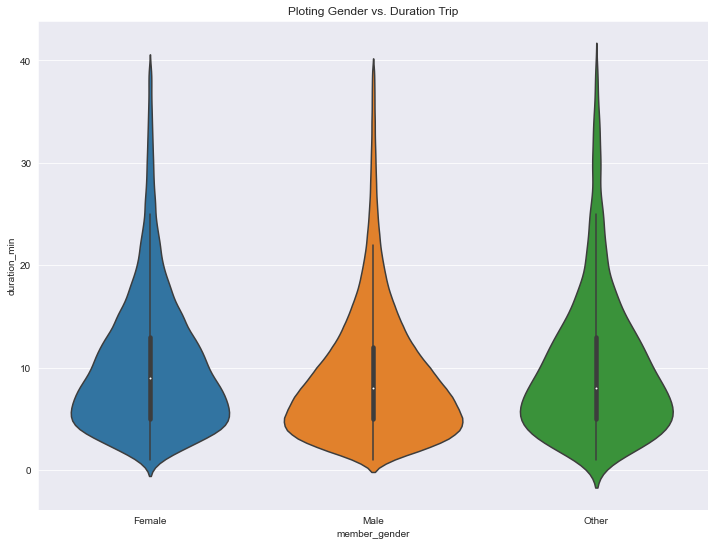

In [186]:
plt.figure(figsize=[ 12, 9]);
plt.title('Ploting Gender vs. Duration Trip')
sb.violinplot(data=df_clean, x='member_gender', y='duration_min');

**Observation**

>The previous figure reveals that males have the lowest standard deviation among all genders though they represnt the majority of our data. 

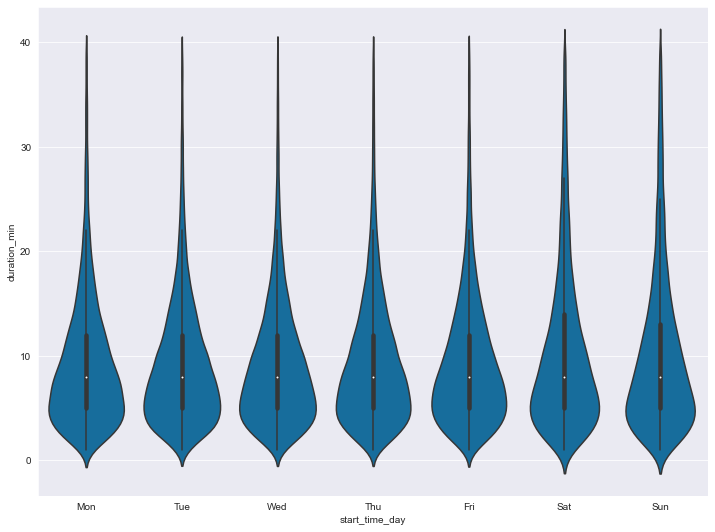

In [187]:
# Duration during the days of week
day_of_week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Refer - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
weekday = pd.api.types.CategoricalDtype(ordered=True, categories=day_of_week)

# Use pandas.astype() to convert the "start_time_dayofweek" column from a plain object type into an ordered categorical type 
df_clean['start_time_day'] = df_clean['start_time_day'].astype(weekday);

plt.figure(figsize=[ 12, 9]);
sb.violinplot(data=df_clean, x='start_time_day', y='duration_min', color = sb.color_palette('colorblind')[0]);

**Observation**

>The previous figure reveals that trip duration does not change very much through weekdays. 

#### Exploring Customer's vs Subscriber's trip durations boxplot

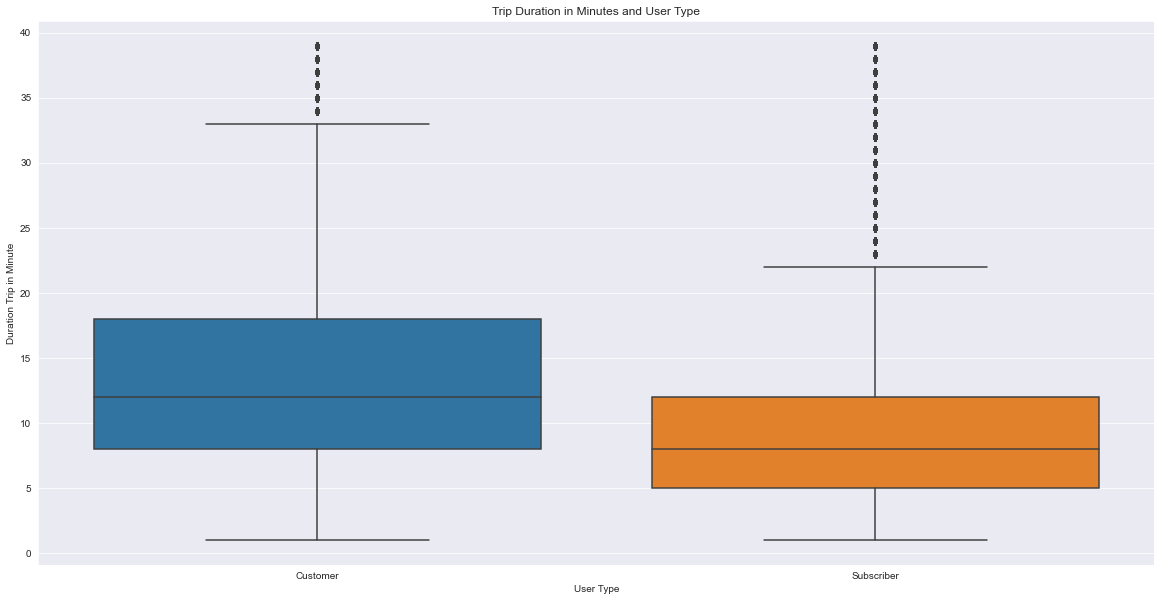

In [188]:
plt.figure(figsize = [20, 10])
sb.boxplot(data=df_clean, x='user_type', y='duration_min');
plt.title('Trip Duration in Minutes and User Type')
plt.xlabel('User Type')
plt.ylabel('Duration Trip in Minute')
plt.show();

**Observation**

-  customer have higher average for trip duration than subscriber's

- Though, the value counts of "Subscriber" is 153,736 of the total "User Type", and the value counts of "Customer" is 16,256 of total "User Type" 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Duration depends on age, when the age is between 20-40, the flight duration for younger ages is higher than for older ones.
> Thursday Highest flight duration during the week.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I thought that variables which are user type and gender values having higher value to get higher trip duration but it is the opposite. 
> For gender variable, the male percentage is higher than the women's but male's trip durations is lower than these of the women's.
> For user type variable, the subscriber percentage is higher than the customer's but subscriber's trip durations is lower than these of the customer's.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

C:\Users\abdel\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\abdel\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


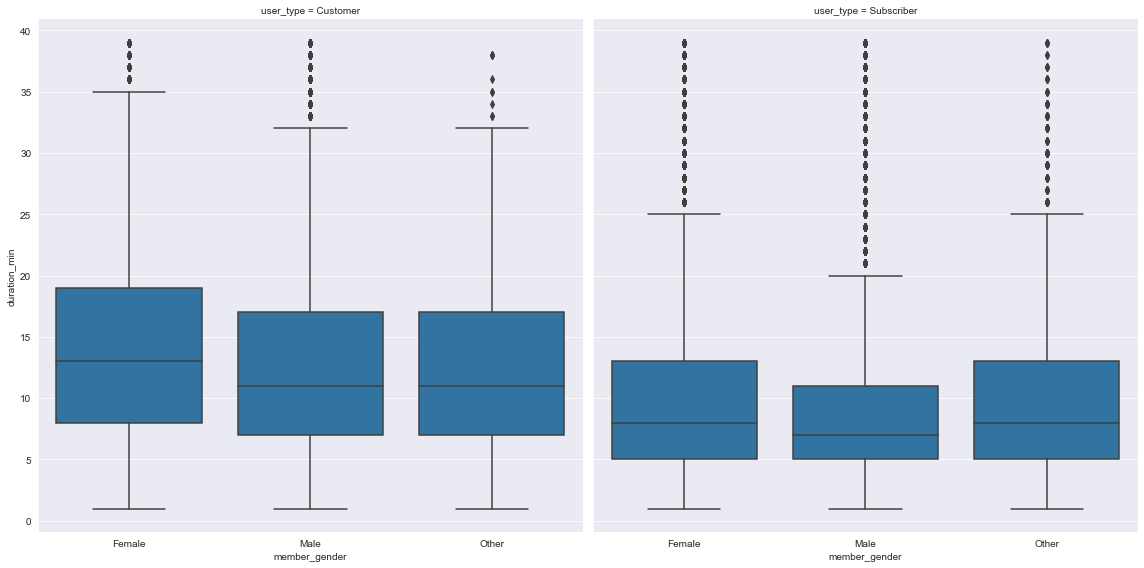

In [189]:
g = sb.FacetGrid(data = df_clean, col = 'user_type', size = 8)
g.map(sb.boxplot, 'member_gender', 'duration_min')

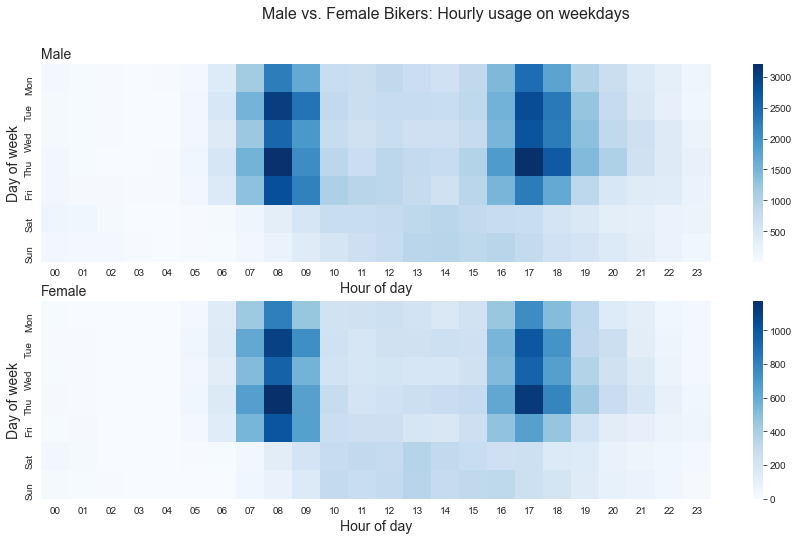

In [190]:
# plot heatmap Male vs. Female Riders and their hourly usage during weekdays
plt.figure(figsize=(15,8))
#plt.subplots_adjust(top=0.9)
plt.suptitle('Male vs. Female Bikers: Hourly usage on weekdays', fontsize=16);

plt.subplot(2, 1, 1)
male = df_clean.query('member_gender == "Male"')
ct_counts = male.groupby(['start_time_day', 'start_time_hour']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'start_time_day', columns = 'start_time_hour', values = 'count')
sb.heatmap(ct_counts, cmap = "Blues");
plt.title('Male', loc = 'left', fontsize = 14);
plt.xlabel('Hour of day', fontsize = 14);
plt.ylabel('Day of week', fontsize = 14);

plt.subplot(2, 1, 2)
female = df_clean.query('member_gender == "Female"')
st_counts = female.groupby(['start_time_day', 'start_time_hour']).size()
st_counts = st_counts.reset_index(name = 'count')
st_counts = st_counts.pivot(index = 'start_time_day', columns = 'start_time_hour', values = 'count')
sb.heatmap(st_counts, cmap = "Blues");
plt.title('Female', loc = 'left', fontsize = 14);
plt.xlabel('Hour of day', fontsize = 14);
plt.ylabel('Day of week', fontsize = 14);

#### Observations
> - There are more males than motorcyclists, but usage shows a similar pattern.
> - Male and female riders start riding their bike on Thursdays between 5:00 AM/PM to 6:00 AM/PM at the latest.

### Customers vs. Subscribers: Hourly usage on weekdays

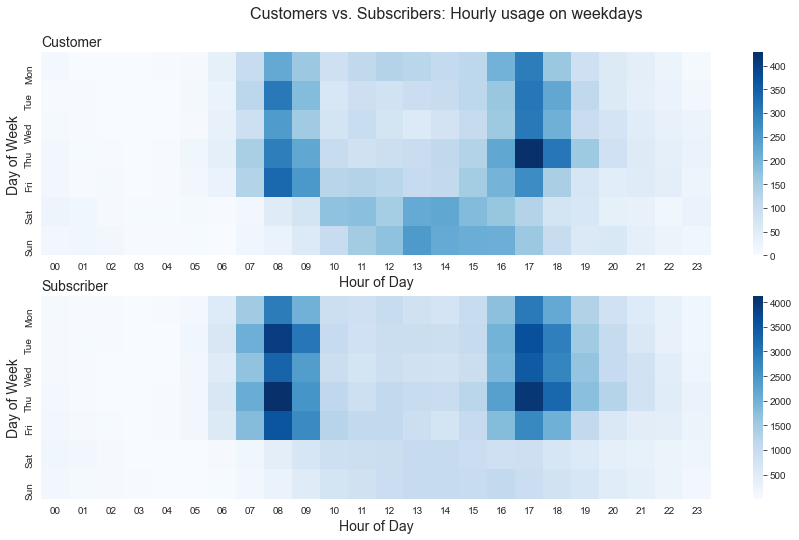

In [191]:
# plot heatmap Customers vs. Subscribers and their hourly usage during weekdays
plt.figure(figsize=(15,8))
plt.subplots_adjust(top = 0.9)
plt.suptitle('Customers vs. Subscribers: Hourly usage on weekdays', fontsize = 16);

plt.subplot(2, 1, 1)
customers = df_clean.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_time_day', 'start_time_hour']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'start_time_day', columns = 'start_time_hour', values = 'count')
sb.heatmap(ct_counts, cmap = "Blues");
plt.title('Customer', loc = 'left', fontsize = 14);
plt.xlabel('Hour of Day', fontsize = 14);
plt.ylabel('Day of Week', fontsize = 14);

plt.subplot(2, 1, 2)
subscribers = df_clean.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_time_day', 'start_time_hour']).size()
st_counts = st_counts.reset_index(name = 'count')
st_counts = st_counts.pivot(index = 'start_time_day', columns = 'start_time_hour', values = 'count')
sb.heatmap(st_counts, cmap = "Blues");
plt.title('Subscriber', loc = 'left', fontsize = 14);
plt.xlabel('Hour of Day', fontsize = 14);
plt.ylabel('Day of Week', fontsize = 14);


> - Customers who ride their bikes on Thursdays from 5:00 pm to 6:00 pm at the latest. I think these are big travelers.
> - Subscribers who ride their bike on Thursdays between 5:00 AM/PM until 6:00 AM/PM, and also use the service more on weekends, are mostly tourists.

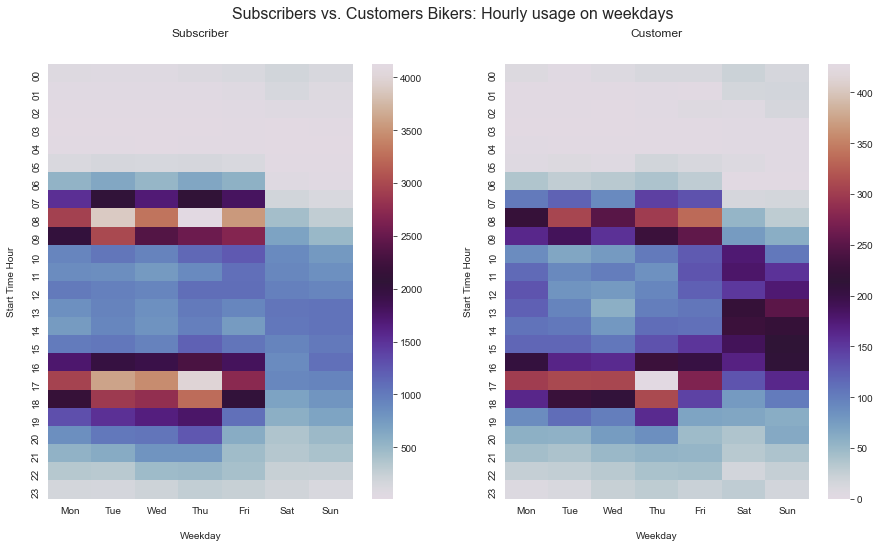

In [192]:
plt.figure(figsize=(15,8))
#plt.subplots_adjust(top=0.9)
plt.suptitle('Subscribers vs. Customers Bikers: Hourly usage on weekdays', fontsize=16);

# Heatmap - Subscribers
plt.subplot(1, 2, 1)
df_subscriber = df_clean.query('user_type == "Subscriber"').groupby(['start_time_hour', 'start_time_day'])['bike_id'].size().reset_index();
df_subscriber = df_subscriber.pivot('start_time_hour', 'start_time_day', 'bike_id')
hot_map = sb.heatmap(df_subscriber, cmap = 'twilight')

plt.title("Subscriber", y=1.05)
plt.xlabel('Weekday', labelpad = 16)
plt.ylabel('Start Time Hour', labelpad = 16);


# Heatmap - Subscribers
plt.subplot(1, 2, 2)
df_subscriber = df_clean.query('user_type == "Customer"').groupby(['start_time_hour', 'start_time_day'])['bike_id'].size().reset_index();
df_subscriber = df_subscriber.pivot('start_time_hour', 'start_time_day', 'bike_id')
hot_map = sb.heatmap(df_subscriber, cmap = 'twilight')

plt.title("Customer", y=1.05)
plt.xlabel('Weekday', labelpad = 16)
plt.ylabel('Start Time Hour', labelpad = 16);

plt.show()


#### Observations
> - The standard deviation of the customer is greater than the subscriber, as shown in the figure
> - The shuttle has a set schedule while customers may have flights outside of their most frequent times which are around 8am and 5pm
> - Subscribers do not usually take trips on weekends, but customers have a large number of trips on weekends.

In [193]:
df_clean.to_csv('clean_data.csv')

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Duration depends on age, when the age is between 20-40, the flight duration for younger ages is higher than for older ones.
> Thursday Highest flight duration during the week.

### Were there any interesting or surprising interactions between features?

> Variables that are user type and gender values do not have to have a higher value to have a longer flight time
> The percentage of males is higher than females, but the males' journey periods are less than those of females, and this is in relation to the gender variable.
> The percentage of subscribers is higher than that of the client, but the duration of the subscriber's journey is less than that of the client, and this is in relation to the user type variable.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!